# SMAI Assignment - 2

## Question - `2` : Face Recognition using Principal Component Analysis

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

### <b>Objective:</b>
This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### <b>About the dataset:</b>  
The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)



### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.


### notes from the research paper // algorithm implementation
*eigen face calc*
- calculate mean img of each dataset
- the difference of each img from this mean img gives us our matrix M
- calculate covariance matrix of S of M
- calculate its eigenvalues and eigenvectors

*image classification*
- project new image onto the eigenfaces
- we get a vector of weights w, which tells us the contribution of each eigenface to that image
- calculate these weights for all training set images by class
- then obtain this for new image
- classify by minimising euclidean distance between the vectors w

#### Import Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread
import os
from sklearn.model_selection import train_test_split
from numpy.linalg import eig

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [2]:
def load_image(path):
    im = imread(path)
    im = np.array(im)
    return im

def display_images(imgs,classes,row=1,col=2,w=92,h=112):
    fig=plt.figure(figsize=(6,6))
    for i in range(col*row):
        img = imgs[i]
        fig.add_subplot(row, col, i+1)
        plt.imshow(img , cmap='gray')
        plt.title(f"Class:{classes[i]}")
        plt.axis('off')
    plt.show()

def load_dataset(dir):
    X, y = list(), list()
    for subdir in os.listdir(dir):
        subdir_copy = os.path.join(dir, subdir)
        if os.path.isdir(subdir_copy):
            for file in os.listdir(subdir_copy):
    #             print(subdir, subdir_copy)
                file = os.path.join(subdir_copy, file)
                if os.path.isfile(file):
                    y.append(int(subdir[1:]))
                    im = load_image(file)
                    X.append(im)
    X = np.array(X)
    y = np.array(y)
    return X, y

dir = './ATnT'
X, y = load_dataset(dir)
print("images dataset:", X.shape)
print("labels: ", y.shape)

images dataset: (400, 112, 92)
labels:  (400,)


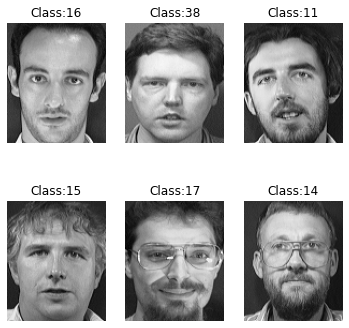

In [3]:
# display images
ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...], y[ind],2,3)

In [4]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(280, 112, 92) (120, 112, 92)
(280,) (120,)


#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [ ]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""

class PCA():
    def __init__(self, X, num_components):
        self.X = X
        self.num_components = num_components
        
    def get_mean_img(self):
        new_imgs = list()
        for i in self.X:
            new_imgs.append(i.flatten())
        new_imgs = np.array(new_imgs)
        self.mean_img = np.mean(new_imgs)
        
    def get_matrix_M(self):
        self.mat_M = list()
        for img in self.X:
            self.mat_M.append(img.flatten() - self.mean_img)
        self.mat_M = np.array(self.mat_M)
        
    def get_covariance_matrix(self):
        flag = 0
        for ind, i in enumerate(self.mat_M):
            print('ind', ind)
            i = np.expand_dims(i, axis=0)
            j = i.transpose()
            if flag == 0:
                A = np.matmul(j, i)
                flag = 1
            else:
                A += np.matmul(j, i)
        
#         print(f"cov_mat1 shape = {A.shape}")
        self.cov_mat = A/len(self.mat_M)
        
    def get_cov_mat(self):
        self.cov_mat2 = np.cov(self.mat_M.transpose(), bias=True)
        print(f'cov_mat2 shape = {self.cov_mat2.shape}')
        
    def get_eigen_values(self):
        self.e_vals, self.e_vecs = eig(self.cov_mat2)
        print(len(e_vals))
        idx = e_vals.argsort()[::-1]
        self.e_vals = self.e_vals[idx]
        self.e_vecs = self.e_vecs[idx]
        
        
    def algo(self):
        self.get_mean_img()
        self.get_matrix_M()
#         self.get_covariance_matrix()
        self.get_cov_mat()
#         print(self.cov_mat == self.cov_mat2)
        self.get_eigen_values()
        return self.e_vals, e_vecs
    
def principalComponentAnalysis(X, number_of_components):
    pca = PCA(X, num_components)
    e_vals, e_vecs = pca.algo()
    return e_vecs

'''
Note that since it takes a long time to compute eigen values and eigen vectors, we will return the whole list of
the eigenvectors and then sort accordingly later on.
'''
e_vecs = principalComponentAnalysis(X, 5)

cov_mat2 shape = (10304, 10304)


#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [ ]:
# Function to implement image reconstruction by taking arguements as necessary.
def imageReconstruction():
  

  return

#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [ ]:
"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""
def model():

  return

In [ ]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""

In [ ]:
# Plot Number of eigenvectors vs Mean Square Error

In [ ]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error

Summarise your observations on the plots and accuracies

**Answer:**

State the advantages and limitations of using PCA in general. Also state its limitations in context of face recognition

**Answer:**